In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

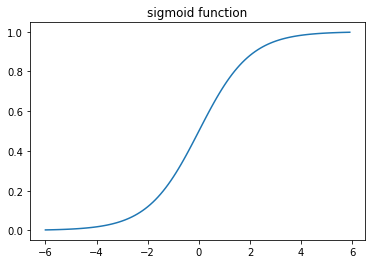

In [6]:
def sigmoid(x):
    return 1/(1+(np.e**(-x)))
x = np.arange(-6,6,0.1)
plt.plot(x, sigmoid(x))
plt.title("sigmoid function")
plt.show()

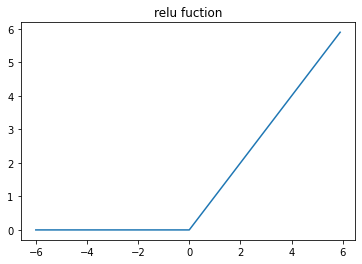

In [7]:
def relu(x):
    return np.maximum(0,x)
x = np.arange(-6,6,0.1)
plt.plot(x, relu(x))
plt.title("relu fuction")
plt.show()


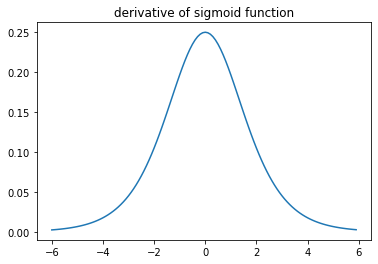

In [8]:
def sigmoid(x):
    return 1/(1+(np.e**(-x)))
def derivative(x):
    return sigmoid(x) * (1-sigmoid(x))
x = np.arange(-6,6,0.1)
plt.plot(x, derivative(x))
plt.title("derivative of sigmoid function")
plt.show()

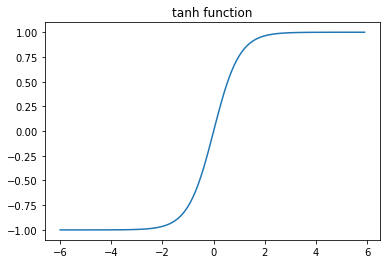

In [9]:
def tanh(x):
    return np.tanh(x)
x = np.arange(-6,6,0.1)
plt.plot(x, tanh(x))
plt.title("tanh function")
plt.show()

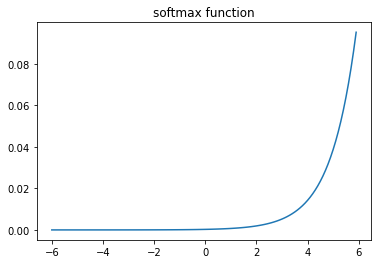

In [12]:
def softmax(x):
    return np.exp(x) / sum(np.exp(x))
x = np.arange(-6,6,0.1)
y = softmax(x)
plt.plot(x,y)
plt.title("softmax function")
plt.show()

[5.0e+00 1.0e+00 2.0e-01 4.0e-02 8.0e-03 1.6e-03]


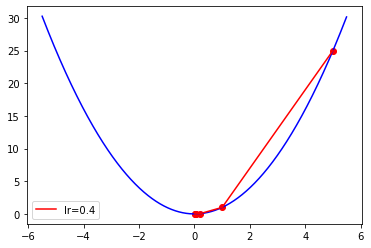

In [18]:
def L(w):
    return w*w
def dL(w):
    return 2*w
def gradient_descent(w_start, df, lr, epochs):
    w_gd=[]
    w_gd.append(w_start)
    pre_w = w_start
    for i in range(epochs):
        w = pre_w - lr * df(pre_w)
        w_gd.append(w)
        pre_w = w
    return np.array(w_gd)
w0 = 5
epochs = 5
lr = 0.4
w_gd = gradient_descent(w0, dL, lr, epochs)
print(w_gd)

t = np.arange(-5.5, 5.5, 0.01)
plt.plot(t, L(t), c="b")
plt.plot(w_gd, L(w_gd), c="r", label="lr={}".format(lr))
plt.scatter(w_gd, L(w_gd), c="r")
plt.legend()
plt.show()

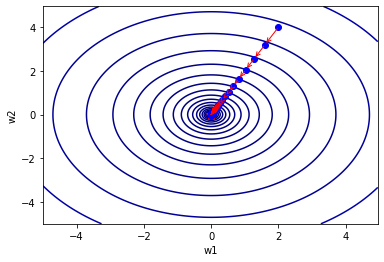

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def L(w1, w2):
    return w1**2 + w2**2

def dL(w):
    return np.array([2*w[0], 2*w[1]])

def gradient_descent(w_start, df, lr, epochs):
    w1_gd = []
    w2_gd = []
    w1_gd.append(w_start[0])
    w2_gd.append(w_start[1]) 
    pre_w = w_start

    for i in range(epochs):
        w = pre_w - lr*df(pre_w)
        w1_gd.append(w[0])
        w2_gd.append(w[1])
        pre_w = w

    return np.array(w1_gd), np.array(w2_gd)

w0 = np.array([2, 4])
lr = 0.1
epochs = 40

x1 = np.arange(-5, 5, 0.05)
x2 = np.arange(-5, 5, 0.05)

w1, w2 = np.meshgrid(x1, x2)

fig1, ax1 = plt.subplots()
ax1.contour(w1, w2, L(w1, w2), levels=np.logspace(-3, 3, 30), cmap='jet')
min_point = np.array([0., 0.])
min_point_ = min_point[:, np.newaxis]
ax1.plot(*min_point_, L(*min_point_), 'r*', markersize=10)
ax1.set_xlabel('w1')
ax1.set_ylabel('w2')

w1_gd, w2_gd = gradient_descent(w0, dL, lr, epochs)
w_gd = np.column_stack([w1_gd, w2_gd])
#print(w_gd)

ax1.plot(w1_gd, w2_gd, 'bo')
for i in range(1, epochs+1):
    ax1.annotate('', xy=(w1_gd[i], w2_gd[i]), 
                   xytext=(w1_gd[i-1], w2_gd[i-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
plt.show()


In [44]:
def one_hot_encoding(raw, num):
    result = []
    for ele in raw:
        arr = np.zeros(num)
        np.put(arr, ele, 1)
        result.append(arr)
    return np.array(result)
digits = np.array([1,3,5,7])
one_hot = one_hot_encoding(digits, 10)
print("   ".join(str(digits)))
print(one_hot)

[   1       3       5       7   ]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [45]:
def normalization(raw):
    max_value = max(raw)
    min_value = min(raw)
    norm = [(float(i)-min_value) / (max_value-min_value) for i in raw]
    return norm
x = np.array([0,45,128,255])
print(x)
norm = normalization(x)
print(norm)
print(x/255)

[  0  45 128 255]
[0.0, 0.17647058823529413, 0.5019607843137255, 1.0]
[0.         0.17647059 0.50196078 1.        ]
